### Background:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

### Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)


### Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

### Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.


In [1]:
# import modules
import random
import os
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Import scikit-learn tools, grid search cross validation, and classifiers

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix,\
roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV


# For tuning the model
from sklearn.model_selection import GridSearchCV

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import pipeline and scaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Create a function to set global seed
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed) 
    os.environ['PYTHONHASHSEED']=str(seed)
    print(seed)



In [3]:
#Pick a value for the seed, and provide to the function
seed = 42
set_seed(seed)
print('Seed_value has been set to ' + str(seed))

42
Seed_value has been set to 42


In [4]:
# load the dataset
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [49]:
## Define subsets of the dataframe for visualization of the data
dfn = df[(df['y'] == 'no')]
dfy = df[(df['y'] == 'yes')]
df_cols = df[:0]
df_cols = df.drop(['y'], axis = 1 )
df_cols.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Create a function for Model Evaluation output

In [7]:
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred_proba = model.predict_proba(X_test)[:,1]
    
    print("TRAINING RESULTS: \n===============================")
    print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
    print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
    print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    print()

    print("TESTING RESULTS: \n===============================")
    print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
    print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
    print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [8]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


## The predictor variable 'y' has a highly imbalanced distribution. Only 7.24% of 40K observations resulted in success.

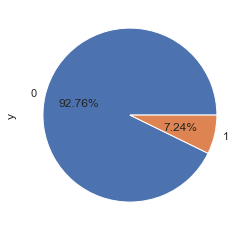

0    37104
1     2896
Name: y, dtype: int64

In [69]:
df['y'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()
df['y'].value_counts()


## For data visualization, we can review all the categorical variables using a pie and bar chrt combination. This lets us see the list of categorical values, along with their percentage of the total and absolute count. We can quickly identify 3 of the features as binary, with only values of "yes/no".

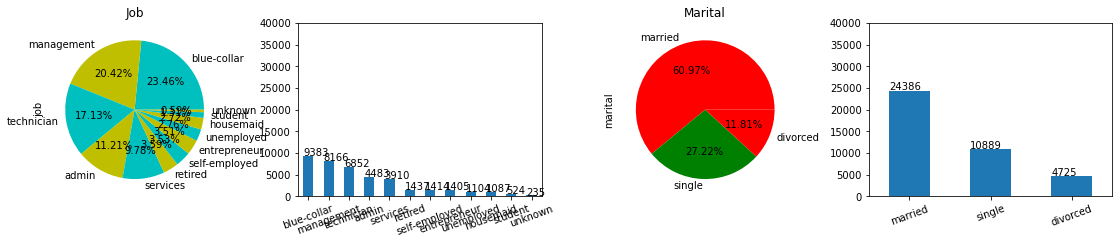

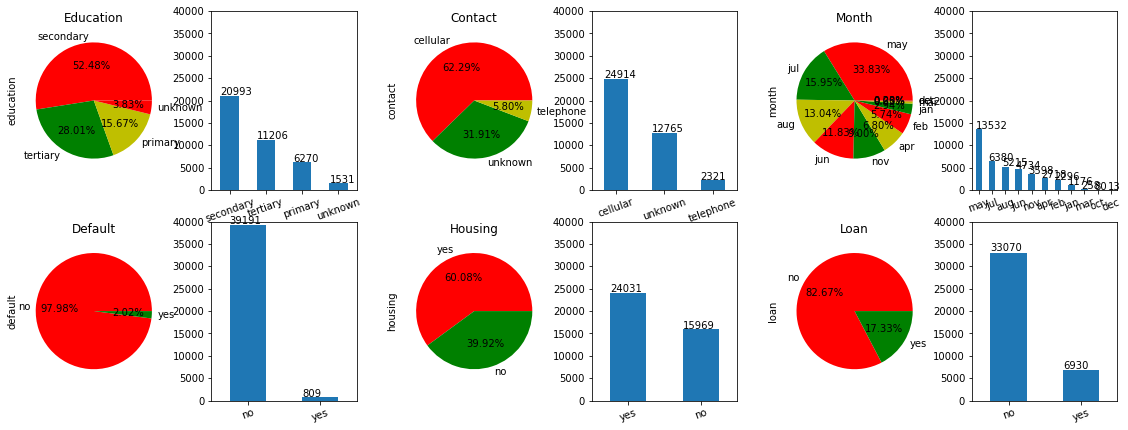

In [9]:
#fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=2, ncols=8, figsize=(16,8))
#fig.tight_layout()

fig, ((ax1, ax2, ax3, ax4))\
= plt.subplots(nrows=1, ncols=4, figsize=(16,3))
fig.tight_layout()

fig,  ((ax5, ax6, ax13, ax14, ax15, ax16),\
      (ax7, ax8, ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=2, ncols=6, figsize=(16,6))
fig.tight_layout()


#fig, ((ax1, ax2, ax3, ax4),\
#      (ax5, ax6, ax7, ax8),\
#      (ax9, ax10, ax11, ax12),\
#      (ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=4, ncols=4, figsize=(16,8))
#fig.tight_layout()


ax1.set_title("Job")
df.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax1, colors='cy')
df.job.value_counts().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax2.set_ylim(0,40000)
    ax2.tick_params(axis='x', labelrotation = 20)

ax3.set_title("Marital")
df.marital.value_counts().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
df.marital.value_counts().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax4.set_ylim(0,40000)
    ax4.tick_params(axis='x', labelrotation = 20)

ax5.set_title("Education")
df.education.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax5, colors='rgy')
df.education.value_counts(dropna=False).plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax6.set_ylim(0,40000)
    ax6.tick_params(axis='x', labelrotation = 20)

ax7.set_title("Default")
df.default.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax7, colors='rgy')
df.default.value_counts(dropna=False).plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax8.set_ylim(0,40000)
    ax8.tick_params(axis='x', labelrotation = 20)

ax9.set_title("Housing")
df.housing.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax9, colors='rgy')
df.housing.value_counts(dropna=False).plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax10.set_ylim(0,40000)
    ax10.tick_params(axis='x', labelrotation = 20)

    
ax11.set_title("Loan")
df.loan.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax11, colors='rgy')
df.loan.value_counts(dropna=False).plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax12.set_ylim(0,40000)
    ax12.tick_params(axis='x', labelrotation = 20)

ax13.set_title("Contact")
df.contact.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax13, colors='rgy')
df.contact.value_counts(dropna=False).plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax14.set_ylim(0,40000)
    ax14.tick_params(axis='x', labelrotation = 20)

ax15.set_title("Month")
df.month.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax15, colors='rgy')
df.month.value_counts(dropna=False).plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax16.set_ylim(0,40000)
    ax16.tick_params(axis='x', labelrotation = 20)

    
plt.show()

## Now let's review the distribution of predictor responses for each feature. The pie chart shows the percentage distribution of "no" responses, while the bar chart shows the split between "yes/no" for each categorical value. We can see a large imbalance in responses at this level as well.

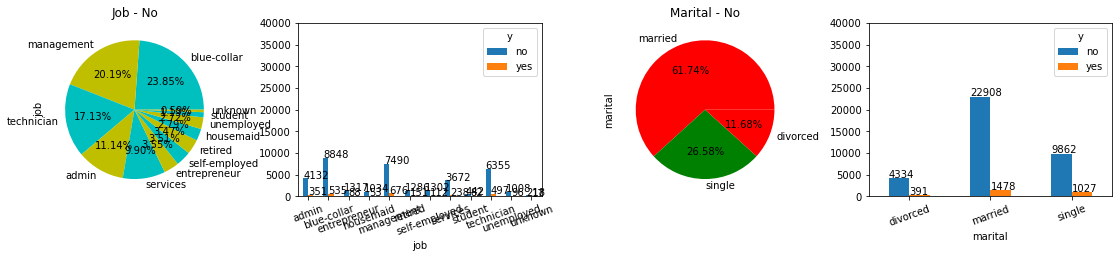

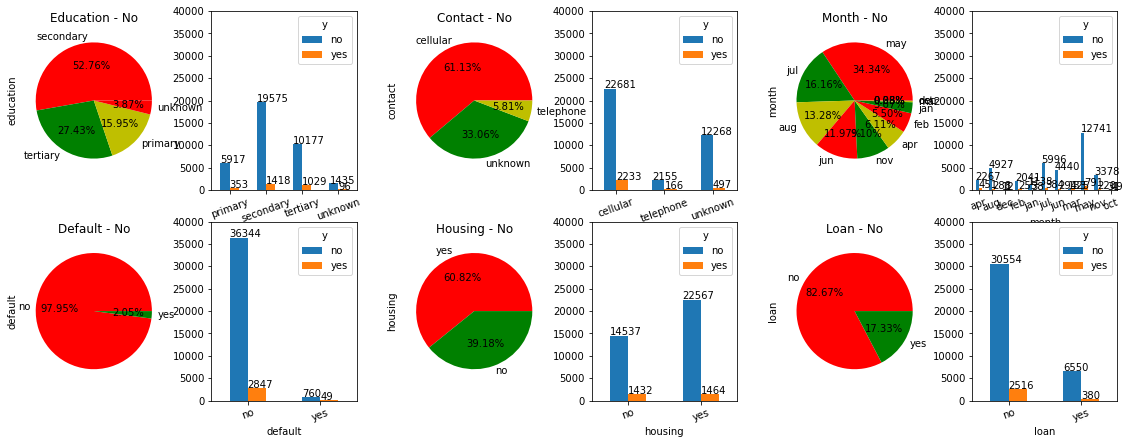

In [10]:
#dfn = df[(df['y'] == 'no')]
#fig, ((ax1, ax2, ax3, ax4),\
#      (ax5, aaluex6, ax7, ax8),\
#      (ax9, ax10, ax11, ax12),\
#      (ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=4, ncols=4, figsize=(16,8))
#fig.tight_layout()

fig, ((ax1, ax2, ax3, ax4))\
= plt.subplots(nrows=1, ncols=4, figsize=(16,3))
fig.tight_layout()

fig,  ((ax5, ax6, ax13, ax14, ax15, ax16),\
      (ax7, ax8, ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=2, ncols=6, figsize=(16,6))
fig.tight_layout()

#fig, ax = plt.subplots(2,16, figsize=(16,4))

ax1.set_title("Job - No")
dfn.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax1, colors='cy')
cross2 = pd.crosstab(df['job'] , df['y'])
cross2.plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax2.set_ylim(0,40000)
    ax2.tick_params(axis='x', labelrotation = 20)

ax3.set_title("Marital - No")
dfn.marital.value_counts().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
cross4 = pd.crosstab(df['marital'] , df['y'])
cross4.plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax4.set_ylim(0,40000)
    ax4.tick_params(axis='x', labelrotation = 20)

ax5.set_title("Education - No")
dfn.education.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax5, colors='rgy')
cross6 = pd.crosstab(df['education'] , df['y'])
cross6.plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax6.set_ylim(0,40000)
    ax6.tick_params(axis='x', labelrotation = 20)

ax7.set_title("Default - No")
dfn.default.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax7, colors='rgy')
cross8 = pd.crosstab(df['default'] , df['y'])
cross8.plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax8.set_ylim(0,40000)
    ax8.tick_params(axis='x', labelrotation = 20)

ax9.set_title("Housing - No")
dfn.housing.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax9, colors='rgy')
cross10 = pd.crosstab(df['housing'] , df['y'])
cross10.plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax10.set_ylim(0,40000)
    ax10.tick_params(axis='x', labelrotation = 20)

    
ax11.set_title("Loan - No")
df.loan.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax11, colors='rgy')
cross12 = pd.crosstab(df['loan'] , df['y'])
cross12.plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax12.set_ylim(0,40000)
    ax12.tick_params(axis='x', labelrotation = 20)

ax13.set_title("Contact - No")
dfn.contact.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax13, colors='rgy')
cross14 = pd.crosstab(df['contact'] , df['y'])
cross14.plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax14.set_ylim(0,40000)
    ax14.tick_params(axis='x', labelrotation = 20)

ax15.set_title("Month - No")
dfn.month.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax15, colors='rgy')
cross16 = pd.crosstab(df['month'] , df['y'])
cross16.plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax16.set_ylim(0,40000)
    ax16.tick_params(axis='x', labelrotation = 20)
    
plt.show()

## Let's check the distribution of "yes" responses only, keeping the scale consistent for all 3 views. We can observe patterns for the full set of features together using this approach.

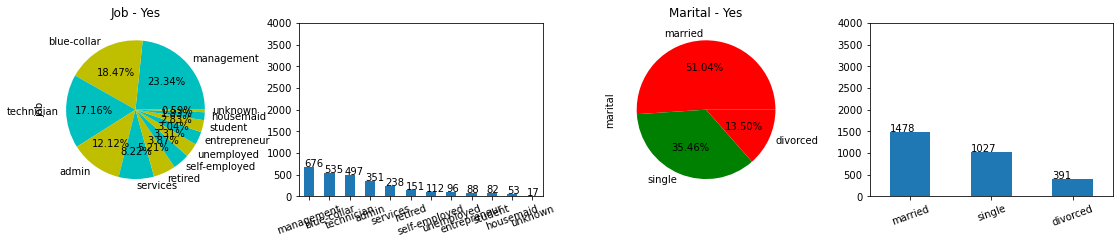

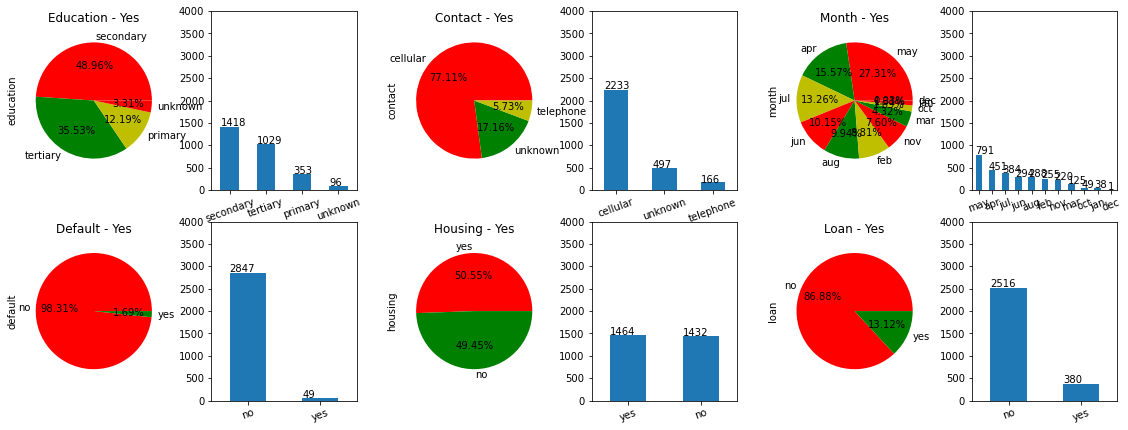

In [11]:
# dfy = df[(df['y'] == 'yes')]
#fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=2, ncols=8, figsize=(16,8))
#fig.tight_layout()

fig, ((ax1, ax2, ax3, ax4))\
= plt.subplots(nrows=1, ncols=4, figsize=(16,3))
fig.tight_layout()

fig,  ((ax5, ax6, ax13, ax14, ax15, ax16),\
      (ax7, ax8, ax9, ax10, ax11, ax12))\
= plt.subplots(nrows=2, ncols=6, figsize=(16,6))
fig.tight_layout()


#fig, ((ax1, ax2, ax3, ax4),\
#      (ax5, ax6, ax7, ax8),\
#      (ax9, ax10, ax11, ax12),\
#      (ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=4, ncols=4, figsize=(16,8))
#fig.tight_layout()


ax1.set_title("Job - Yes")
dfy.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax1, colors='cy')
dfy.job.value_counts().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax2.set_ylim(0,4000)
    ax2.tick_params(axis='x', labelrotation = 20)

ax3.set_title("Marital - Yes")
dfy.marital.value_counts().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfy.marital.value_counts().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax4.set_ylim(0,4000)
    ax4.tick_params(axis='x', labelrotation = 20)

ax5.set_title("Education - Yes")
dfy.education.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax5, colors='rgy')
dfy.education.value_counts(dropna=False).plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax6.set_ylim(0,4000)
    ax6.tick_params(axis='x', labelrotation = 20)

ax7.set_title("Default - Yes")
dfy.default.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax7, colors='rgy')
dfy.default.value_counts(dropna=False).plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax8.set_ylim(0,4000)
    ax8.tick_params(axis='x', labelrotation = 20)

ax9.set_title("Housing - Yes")
dfy.housing.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax9, colors='rgy')
dfy.housing.value_counts(dropna=False).plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax10.set_ylim(0,4000)
    ax10.tick_params(axis='x', labelrotation = 20)

    
ax11.set_title("Loan - Yes")
dfy.loan.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax11, colors='rgy')
dfy.loan.value_counts(dropna=False).plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax12.set_ylim(0,4000)
    ax12.tick_params(axis='x', labelrotation = 20)

ax13.set_title("Contact - Yes")
dfy.contact.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax13, colors='rgy')
dfy.contact.value_counts(dropna=False).plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax14.set_ylim(0,4000)
    ax14.tick_params(axis='x', labelrotation = 20)

ax15.set_title("Month - Yes")
dfy.month.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax15, colors='rgy')
dfy.month.value_counts(dropna=False).plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax16.set_ylim(0,4000)
    ax16.tick_params(axis='x', labelrotation = 20)

    
plt.show()


## For numerical features, check histograms and boxplots. We have some highly skewed data features, and others which have little skew and in between. 

In [12]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

age
Skew : 0.44


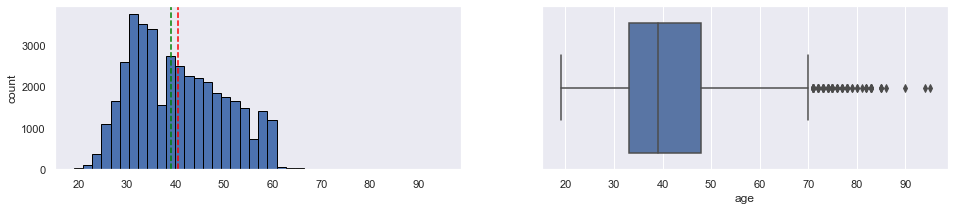

balance
Skew : 8.26


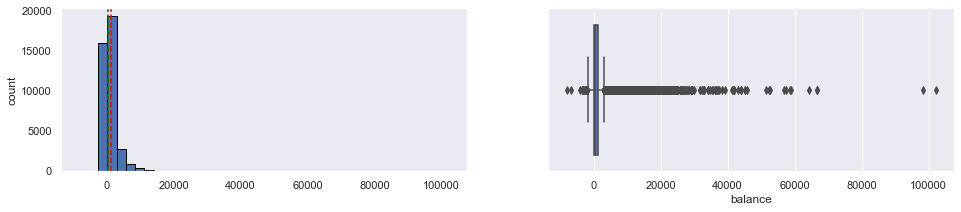

day
Skew : 0.07


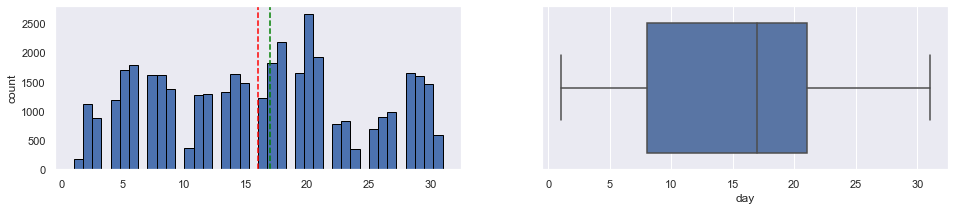

duration
Skew : 3.17


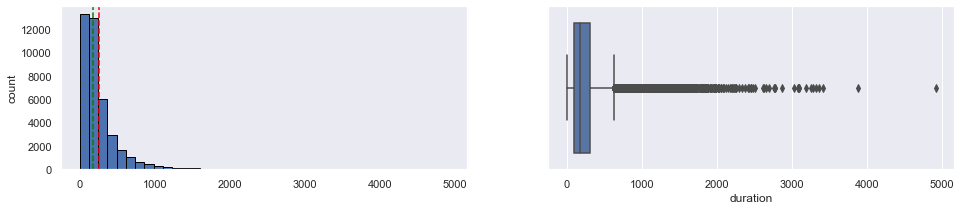

campaign
Skew : 4.73


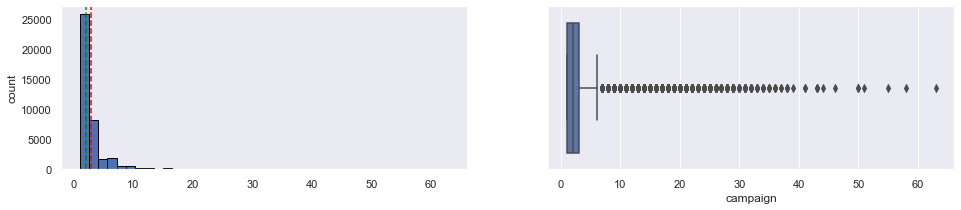

In [13]:
# Plotting a histogram and boxplot to check the distribution of our numerical data
sns.set(font_scale = 1)
cont_cols = list(df[num_cols])
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=40, grid=False, ec='black')
    plt.axvline(x = df[col].mean(), linestyle ="--", color ='red')
    plt.axvline(x = df[col].median(), linestyle ="--", color ='green')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

## Check for duplicates

In [14]:
data_dup = df[df.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


In [15]:
data_dup.shape

(0, 14)

## Check the pairplots. Hard to interpret most of them, but easy to request the full lot. Takes a long time to run, so might comment it out for testing.

In [16]:
#%%time
#sns.pairplot(df, hue='y')
#plt.show()

## Convert binary variables from "yes/no"  to "1/0" and check correlation

In [17]:
#Convert y to binary variables
df['y'] = df['y'].replace('yes', 1)
df['y'] = df['y'].replace('no', 0)

df['default'] = df['default'].replace('yes', 1)
df['default'] = df['default'].replace('no', 0)

df['housing'] = df['housing'].replace('yes', 1)
df['housing'] = df['housing'].replace('no', 0)

df['loan'] = df['loan'].replace('yes', 1)
df['loan'] = df['loan'].replace('no', 0)


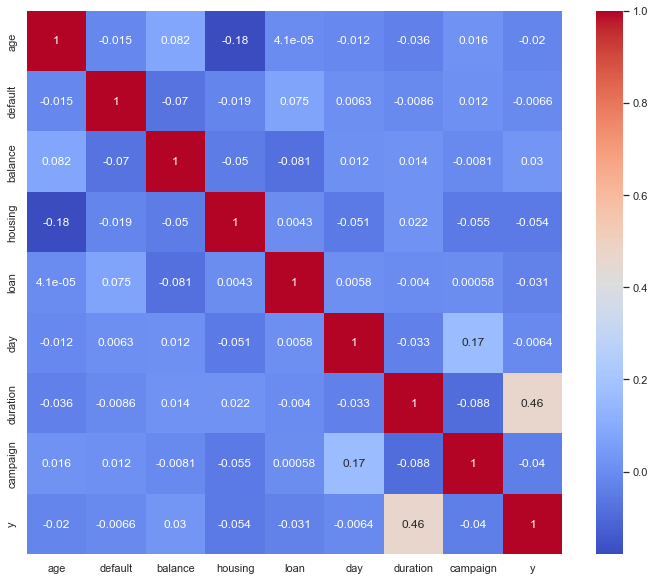

In [18]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

## Convert the catergorical features with pandas "one-hot encoding" to make binary variables out of each category value 

In [19]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 
                               'month',], drop_first=True)

## The dataframe is converted so it can be defined for Train, Test, Split and pipelines. The one-hot encoding made sensible column names. Check df.info() and df.head() to verify the boolean and numerical types. If the "day" distribution had a pattern, would it make sense to convert to 31 categories ? How about replacing other numericals with the range classifications ? Or just including them and potentially eliminating from all based on feature importance ? 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   default              40000 non-null  int64
 2   balance              40000 non-null  int64
 3   housing              40000 non-null  int64
 4   loan                 40000 non-null  int64
 5   day                  40000 non-null  int64
 6   duration             40000 non-null  int64
 7   campaign             40000 non-null  int64
 8   y                    40000 non-null  int64
 9   job_blue-collar      40000 non-null  uint8
 10  job_entrepreneur     40000 non-null  uint8
 11  job_housemaid        40000 non-null  uint8
 12  job_management       40000 non-null  uint8
 13  job_retired          40000 non-null  uint8
 14  job_self-employed    40000 non-null  uint8
 15  job_services         40000 non-null  uint8
 16  job_student          4

In [21]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,y,job_blue-collar,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## The full correlation plot shows a few more significant values. It will be interesting to see how feature importance analysis relates to these realtionships.

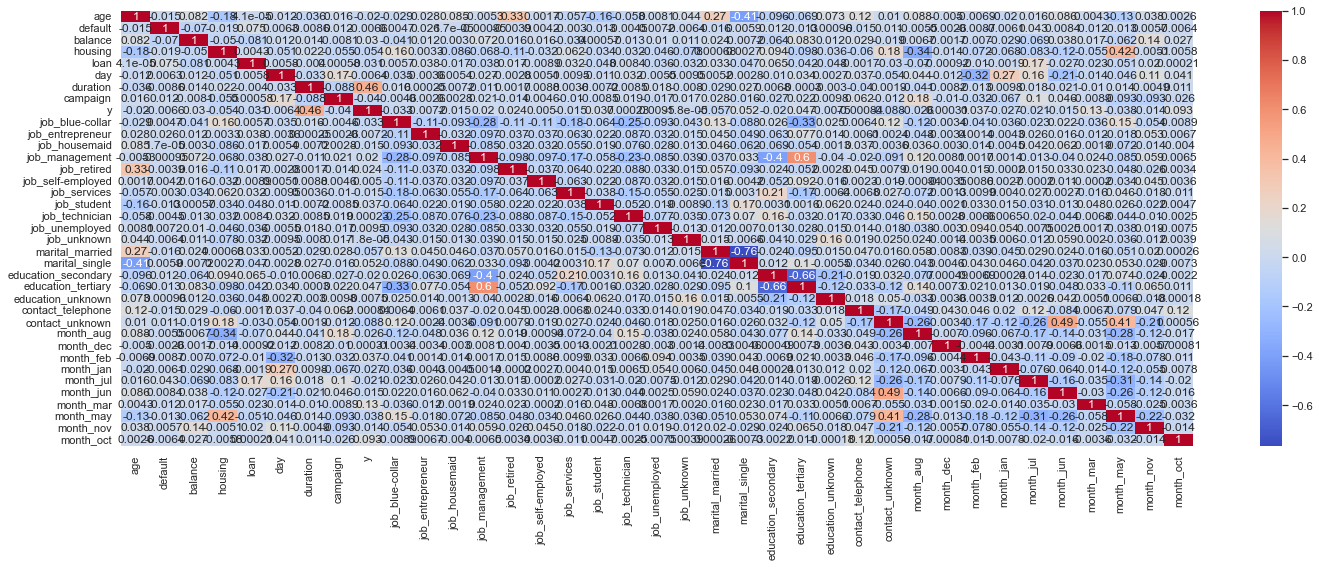

In [22]:
plt.figure(figsize=(24,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

## Preparing to use "LazyPredict", errors were encountered that are temporarily resolved by downgrading Scitkit-Learn to 0.23.2 from 0.24.2 - Note all_estimators can be shown even in v.24, but the Supervised.py file has an exclusion list. 

In [23]:
import sklearn
estimators = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)



AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


In [24]:
# Checking version because lazypredict is incompatible with v.24
print(sklearn.__version__)

0.23.2


In [25]:
#Even though this runs, it does not work in the .py file in v.24
from sklearn.utils import all_estimators

In [26]:
#This does not work with v.24, and is the first error encountered if you try to resolve one at a time
from sklearn.utils.testing import all_estimators

## Import LazyPredict, define Train, Test, Split with no transormations, all default model parameters are used. Transformations may include standard scaler, normalization, imbalance remedies such as SMOTE, and others. 

In [27]:
import lazypredict

In [28]:
from lazypredict.Supervised import LazyClassifier

In [29]:
# Separating target variable and other variables
X = df.drop(columns = ['y'])
y = df.y

In [30]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=seed)

# split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 28000
X Testing set sample size: 12000
y Training set sample size: 28000
y Testing set sample size: 12000


## This is a good way to identify some strong candidates for selection. The Nearest Centroid model has the best ROC AUC score by a wide margin. RandomForestClassifier and LogisticRegression fall in the middle of the pack, but will be included due to explainability of the models. Parameter tuning will be reviewed with GridsearchCV and RandomsearchCV, as well as an automation tool equivalent to LazyPredict for parameter tuning.

In [31]:
%%time
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|██████████████████████████████████████▌    | 26/29 [18:25<00:25,  8.35s/it]

[02:03:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [18:32<00:00, 38.36s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.89               0.83     0.83      0.91   
LinearDiscriminantAnalysis         0.93               0.69     0.69      0.93   
DecisionTreeClassifier             0.91               0.69     0.69      0.91   
Perceptron                         0.91               0.69     0.69      0.91   
XGBClassifier                      0.94               0.69     0.69      0.93   
LGBMClassifier                     0.94               0.68     0.68      0.93   
PassiveAggressiveClassifier        0.90               0.67     0.67      0.90   
LabelPropagation                   0.92               0.65     0.65      0.91   
LabelSpreading                     0.92               0.65     0.65      0.91   
RandomForestClassifier             0.94               0.65     0.65      0.93   
BaggingClassifier           

## Transform the data using standardscaler() to normalize. Visualize the original vs transformed feature set. 

In [32]:
# split data between test and training data , standardising the data 

# Splitting the data
X_train_s, X_test_s, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=seed)
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


X_train_s = pd.DataFrame(X_train_s, columns=X.columns)
X_test_s = pd.DataFrame(X_test_s, columns=X.columns)
X_train_s.head()

,age,default,balance,housing,loan,day,duration,campaign,job_blue-collar,job_entrepreneur,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,-1.10,-0.14,-0.34,0.82,-0.46,-0.25,-0.30,-0.27,-0.55,5.29,...,-0.39,-0.02,-0.25,-0.17,-0.44,-0.37,-0.08,1.41,-0.31,-0.04
1,-0.68,-0.14,-0.20,0.82,-0.46,-0.49,-0.34,0.34,-0.55,5.29,...,-0.39,-0.02,-0.25,-0.17,-0.44,-0.37,-0.08,1.41,-0.31,-0.04
2,-1.72,-0.14,0.07,0.82,-0.46,-0.49,-0.17,-0.57,1.82,-0.19,...,-0.39,-0.02,-0.25,-0.17,-0.44,-0.37,-0.08,1.41,-0.31,-0.04
3,0.25,-0.14,-0.41,0.82,-0.46,1.32,-0.73,0.04,-0.55,-0.19,...,-0.39,-0.02,-0.25,-0.17,-0.44,-0.37,-0.08,1.41,-0.31,-0.04
4,-0.58,-0.14,-0.44,0.82,-0.46,0.48,-0.84,-0.57,1.82,-0.19,...,-0.39,-0.02,-0.25,-0.17,-0.44,2.72,-0.08,-0.71,-0.31,-0.04


## Run LazyPredict on the Normalized data. The results appear to be the same, at least within rounding to 2 decimals in the scoring. When comparing straight models and the pipeline, the transformed data results are close but not the same.

In [33]:
%%time
clfs = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clfs.fit(X_train_s, X_test_s, y_train, y_test)

print(models)

 90%|██████████████████████████████████████▌    | 26/29 [17:16<00:23,  7.68s/it]

[02:20:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [17:21<00:00, 35.91s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.89               0.83     0.83      0.91   
LinearDiscriminantAnalysis         0.93               0.69     0.69      0.93   
DecisionTreeClassifier             0.91               0.69     0.69      0.91   
Perceptron                         0.91               0.69     0.69      0.91   
XGBClassifier                      0.94               0.69     0.69      0.93   
LGBMClassifier                     0.94               0.68     0.68      0.93   
PassiveAggressiveClassifier        0.90               0.67     0.67      0.90   
LabelPropagation                   0.92               0.65     0.65      0.91   
LabelSpreading                     0.92               0.65     0.65      0.91   
RandomForestClassifier             0.94               0.65     0.65      0.93   
BaggingClassifier           

## Use Hyperopt for automated parameter tuning and model selection.  

In [34]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
#from hpsklearn import lightgbm
#from hpsklearn import sgd
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import random_forest

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [38]:
%%time
# define search
#hmodel = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'),\
#                            algo=tpe.suggest, max_evals=150, trial_timeout=60)
hmodel = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'),\
                           algo=tpe.suggest, max_evals=20, trial_timeout=60)

# perform the search
hmodel.fit(X_train, y_train)
#predicth = hmodel.predict(X_test, y_test)

# summarize performance
acc = hmodel.score(X_test, y_test)
print("Accuracy: %.3f" % acc)

# summarize the best model
print(hmodel.best_model())

100%|████████| 10/10 [00:05<00:00,  5.51s/trial, best loss: 0.06374999999999997]
[02:32:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100%|████████| 17/17 [01:00<00:00, 60.11s/trial, best loss: 0.06374999999999997]
[02:35:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100%|████████| 20/20 [00:06<00:00,  6.04s/trial, best loss: 0.06374999999999997]
Accuracy: 0.935
{'learner': Gradien

In [39]:
predicth_test = hmodel.predict(X_test)
predicth_train = hmodel.predict(X_train)
predicth_model = hmodel.best_model()

In [40]:
print(predicth_model)
print (confusion_matrix(y_train , predicth_train))
print("Train Recall score: " , recall_score(y_train , predicth_train))
print("Train ROCAUC score: " , roc_auc_score(y_train , predicth_train))
print ("Train Accuracy score: ", accuracy_score(y_train , predicth_train))
print("Train F1 score: ", f1_score(y_train , predicth_train))
print("Train Precision score: " , precision_score(y_train , predicth_train))
print (classification_report(y_train , predicth_train))

print (confusion_matrix(y_test , predicth_test))
print("Train Recall score: " , recall_score(y_test , predicth_test))
print("Train ROCAUC score: " , roc_auc_score(y_test , predicth_test))
print ("Train Accuracy score: ", accuracy_score(y_test , predicth_test))
print("Train F1 score: ", f1_score(y_test , predicth_test))
print("Train Precision score: " , precision_score(y_test , predicth_test))
print (classification_report(y_test , predicth_test))


{'learner': GradientBoostingClassifier(learning_rate=0.39776069603077036, max_depth=4,
                           max_features=0.9950539707747745, min_samples_leaf=6,
                           n_estimators=15, random_state=2,
                           subsample=0.9302368789803737), 'preprocs': (PCA(n_components=36, whiten=True),), 'ex_preprocs': ()}
[[25633   343]
 [ 1127   897]]
Train Recall score:  0.4431818181818182
Train ROCAUC score:  0.7149886608617745
Train Accuracy score:  0.9475
Train F1 score:  0.5496323529411765
Train Precision score:  0.7233870967741935
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     25976
           1       0.72      0.44      0.55      2024

    accuracy                           0.95     28000
   macro avg       0.84      0.71      0.76     28000
weighted avg       0.94      0.95      0.94     28000

[[10930   198]
 [  587   285]]
Train Recall score:  0.3268348623853211
Train ROCAUC score:  0.65452

## Specify the classifier as RFC for HYPEROPT tuning, so we can validate results using the selected parameters in the pipeline cross-validation. The Nearest Centroid model, which was identified as most accurate by LazyPredict, is not available in HYPEROPT, so we can't use it for parameter tuning of that model.

In [41]:
%%time
# define search
#hmodel = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'),\
#                            algo=tpe.suggest, max_evals=150, trial_timeout=60)
hrfc = HyperoptEstimator(classifier=random_forest('rfc-h'), preprocessing=any_preprocessing('pre'),\
                           algo=tpe.suggest, max_evals=20, trial_timeout=40)

# perform the search
hrfc.fit(X_train, y_train)
hrfc_train = hrfc.predict(X_train)
hrfc_test = hrfc.predict(X_test)

# summarize performance
acc = hrfc.score(X_test, y_test)
print("Accuracy: %.3f" % acc)

# summarize the best model
print(hrfc.best_model())

100%|████████| 20/20 [00:22<00:00, 22.63s/trial, best loss: 0.05982142857142858]
Accuracy: 0.935
{'learner': RandomForestClassifier(bootstrap=False, max_features=0.6461146253324858,
                       min_samples_leaf=6, n_estimators=282, n_jobs=1,
                       random_state=3, verbose=False), 'preprocs': (), 'ex_preprocs': ()}
CPU times: user 39.4 s, sys: 669 ms, total: 40.1 s
Wall time: 7min 57s


In [44]:
print(hrfc.best_model())

print (confusion_matrix(y_train , hrfc_train))
print("Train Recall score: " , recall_score(y_train , hrfc_train))
print("Train ROCAUC score: " , roc_auc_score(y_train , hrfc_train))
print ("Train Accuracy score: ", accuracy_score(y_train , hrfc_train))
print("Train F1 score: ", f1_score(y_train , hrfc_train))
print("Train Precision score: " , precision_score(y_train , hrfc_train))
print (classification_report(y_train , hrfc_train))

print (confusion_matrix(y_test , hrfc_test))
print("Train Recall score: " , recall_score(y_test , hrfc_test))
print("Train ROCAUC score: " , roc_auc_score(y_test , hrfc_test))
print ("Train Accuracy score: ", accuracy_score(y_test , hrfc_test))
print("Train F1 score: ", f1_score(y_test , hrfc_test))
print("Train Precision score: " , precision_score(y_test , hrfc_test))
print (classification_report(y_test , hrfc_test))



{'learner': RandomForestClassifier(bootstrap=False, max_features=0.6461146253324858,
                       min_samples_leaf=6, n_estimators=282, n_jobs=1,
                       random_state=3, verbose=False), 'preprocs': (), 'ex_preprocs': ()}
[[25900    76]
 [  498  1526]]
Train Recall score:  0.7539525691699605
Train ROCAUC score:  0.8755133957645306
Train Accuracy score:  0.9795
Train F1 score:  0.8416988416988417
Train Precision score:  0.9525593008739076
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25976
           1       0.95      0.75      0.84      2024

    accuracy                           0.98     28000
   macro avg       0.97      0.88      0.92     28000
weighted avg       0.98      0.98      0.98     28000

[[10879   249]
 [  526   346]]
Train Recall score:  0.3967889908256881
Train ROCAUC score:  0.6872065011641022
Train Accuracy score:  0.9354166666666667
Train F1 score:  0.47171097477845947
Train Precision s

## Run the RandomForestClassifier with no adjustments. Later we will baseline the results to the pipeline, where pre-porcessing and parameter selection can be performed with GridSearchCV or RandomSearchCV.

In [45]:
%%time
#Run Random Forest Classifier with default settings, before scaling and tuning 
rc = RandomForestClassifier()

rc.fit(X_train, y_train)

rc_test_predict = rc.predict(X_test)
rc_train_predict = rc.predict(X_train)

print (confusion_matrix(y_train , rc_train_predict))
print("Train Recall score: " , recall_score(y_train , rc_train_predict))
print("Train ROCAUC score: " , roc_auc_score(y_train , rc_train_predict))
print ("Train Accuracy score: ", accuracy_score(y_train , rc_train_predict))
print("Train F1 score: ", f1_score(y_train , rc_train_predict))
print("Train Precision score: " , precision_score(y_train , rc_train_predict))
print (classification_report(y_train , rc_train_predict))


print (confusion_matrix(y_test , rc_test_predict))
print("Test Recall score: " , recall_score(y_test , rc_test_predict))
print("Test ROCAUC score: " , roc_auc_score(y_test , rc_test_predict))
print ("Test Accuracy score: ", accuracy_score(y_test , rc_test_predict))
print("Test F1 score: ", f1_score(y_test , rc_test_predict))
print("Test Precision score: " , precision_score(y_test , rc_test_predict))
print (classification_report(y_test , rc_test_predict))
rc

[[25976     0]
 [    0  2024]]
Train Recall score:  1.0
Train ROCAUC score:  1.0
Train Accuracy score:  1.0
Train F1 score:  1.0
Train Precision score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25976
           1       1.00      1.00      1.00      2024

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000

[[10957   171]
 [  601   271]]
Test Recall score:  0.31077981651376146
Test ROCAUC score:  0.647706586905335
Test Accuracy score:  0.9356666666666666
Test F1 score:  0.4124809741248098
Test Precision score:  0.6131221719457014
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11128
           1       0.61      0.31      0.41       872

    accuracy                           0.94     12000
   macro avg       0.78      0.65      0.69     12000
weighted avg     

RandomForestClassifier()

## The training result for RFC with no adjustments is almost too perfect. The test result does not match, indicating overfitting. The recall and ROCAUC scores are also low. Next, we can run the model on train/test set transformed with StandardScaler to normalize. The result is negligibly better in terms of overfitting, and it makes sense to use the transformation in the pipeline model.

In [46]:
#Run Random Forest Classifier with default settings, before scaling and tuning 
rc_s = RandomForestClassifier()

rc_s.fit(X_train_s, y_train)

rc_s_test_predict = rc_s.predict(X_test_s)
rc_s_train_predict = rc_s.predict(X_train_s)

print (confusion_matrix(y_train , rc_s_train_predict))
print("Train Recall score: " , recall_score(y_train , rc_s_train_predict))
print("Train ROCAUC score: " , roc_auc_score(y_train , rc_s_train_predict))
print ("Train Accuracy score: ", accuracy_score(y_train , rc_s_train_predict))
print("Train F1 score: ", f1_score(y_train , rc_s_train_predict))
print("Train Precision score: " , precision_score(y_train , rc_s_train_predict))
print (classification_report(y_train , rc_s_train_predict))


print (confusion_matrix(y_test , rc_s_test_predict))
print("Test Recall score: " , recall_score(y_test , rc_s_test_predict))
print("Test ROCAUC score: " , roc_auc_score(y_test , rc_s_test_predict))
print ("Test Accuracy score: ", accuracy_score(y_test , rc_s_test_predict))
print("Test F1 score: ", f1_score(y_test , rc_s_test_predict))
print("Test Precision score: " , precision_score(y_test , rc_s_test_predict))
print (classification_report(y_test , rc_s_test_predict))
rc_s

[[25976     0]
 [    0  2024]]
Train Recall score:  1.0
Train ROCAUC score:  1.0
Train Accuracy score:  1.0
Train F1 score:  1.0
Train Precision score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25976
           1       1.00      1.00      1.00      2024

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000

[[10951   177]
 [  605   267]]
Test Recall score:  0.30619266055045874
Test ROCAUC score:  0.6451434187008225
Test Accuracy score:  0.9348333333333333
Test F1 score:  0.40577507598784196
Test Precision score:  0.6013513513513513
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11128
           1       0.60      0.31      0.41       872

    accuracy                           0.93     12000
   macro avg       0.77      0.65      0.69     12000
weighted avg   

RandomForestClassifier()

## Check the pipeline with RFC default parameters, then add standardscaler and compare to the non-pipeline result. For the unadjusted baseline, we will use GridSearchCV, and switch to RandomizedSearchCV for further tuning. The results are very similar.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished


Tuned GridsearchCV Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'gini', 'rfc__max_depth': None, 'rfc__n_estimators': 100, 'rfc__random_state': 42}
Tuned GridsearchCV Accuracy: 0.9353928571428571
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__class_weight': [None],
                         'rfc__criterion': ['gini'], 'rfc__max_depth': [None],
                         'rfc__n_estimators': [100],
                         'rfc__random_state': [42]},
             verbose=True)
TRAINING RESULTS: 
RECALL SCORE:1.0000
ROCAUC SCORE:1.0000
ACCURACY SCORE:1.0000
F1 SCORE:1.0000
CONFUSION MATRIX:
[[25976     0]
 [    0  2024]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    1.00      1.00       1.00          1.00
recall        1.00    1.00      1.00       1.00          1.00
f1-score      1.00    1.00      1.00       1.00      

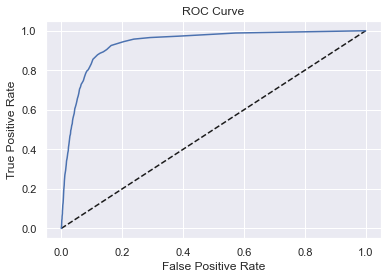

CPU times: user 4.54 s, sys: 247 ms, total: 4.79 s
Wall time: 17 s


In [47]:
%%time
# Setup the pipeline
steps = [
         ('rfc', RandomForestClassifier())
         ]

pipeline = Pipeline(steps)

param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                'rfc__random_state' : [seed],
                'rfc__criterion' : ['gini'],
                'rfc__n_estimators' : [100],              
}

# Instantiate the GridSearchCV object
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned GridsearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned GridsearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Check feature importance from the RFC pipeline. Note that "duration" is the most influential by a large margin. The importance level then drops off after the next 4: balace, age, day, and campaign.  

<AxesSubplot:>

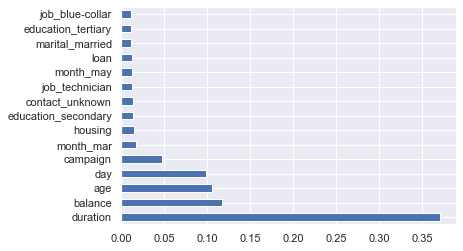

In [51]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_,index=df_cols.columns)
feat_importances.nlargest(15).plot(kind='barh')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 42, 'rfc__n_estimators': 100, 'rfc__max_depth': None, 'rfc__criterion': 'gini', 'rfc__class_weight': None}
Tuned RandomizedSearchCV Accuracy: 0.9355
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__class_weight': [None],
                                        'rfc__criterion': ['gini'],
                                        'rfc__max_depth': [None],
                                        'rfc__n_estimators': [100],
                                        'rfc__random_state': [42]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:1.0000
ROCAUC SCORE:1.0000
ACCURACY SCORE:1.0000
F1 SCORE:1.0000
CONFUSION MATRIX:
[[25976     0]
 [    0  2024]]
CLASSIFICATION RE

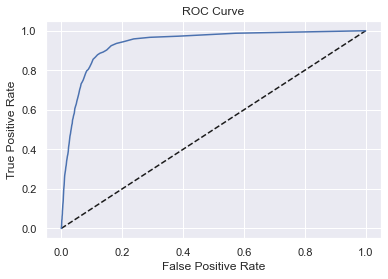

CPU times: user 5 s, sys: 146 ms, total: 5.15 s
Wall time: 14.9 s


In [52]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier())
         ]

pipeline = Pipeline(steps)

param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                'rfc__random_state' : [seed],
                'rfc__criterion' : ['gini'],
                'rfc__n_estimators' : [100],              
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Now add SMOTE (Synthetic Minority Oversampling Technique) to the pipleline, as it makes sense to address the highly imbalanced nature of the predictor variable. Note that we need to switch the pipeline to "imblearn" from "sklearn" for SMOTE. The accuracy was already above 90%. The model overfit was reduced, as observed by an increase in ROCAUC from 65% to 75%. Recall improved from 31% to 54%.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 42, 'rfc__n_estimators': 100, 'rfc__max_depth': None, 'rfc__criterion': 'gini', 'rfc__class_weight': None}
Tuned RandomizedSearchCV Accuracy: 0.9258928571428571
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('smote', SMOTE()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__class_weight': [None],
                                        'rfc__criterion': ['gini'],
                                        'rfc__max_depth': [None],
                                        'rfc__n_estimators': [100],
                                        'rfc__random_state': [42]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:1.0000
ROCAUC SCORE:1.0000
ACCURACY SCORE:1.0000
F1 SC

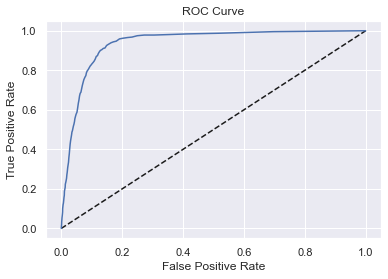

CPU times: user 9.17 s, sys: 156 ms, total: 9.32 s
Wall time: 27.5 s


In [53]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
#         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('rfc', RandomForestClassifier())
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                'rfc__random_state' : [seed],
                'rfc__criterion' : ['gini'],
                'rfc__n_estimators' : [100],              
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Checking feature importance with SMOTE shows little change in results.

<AxesSubplot:>

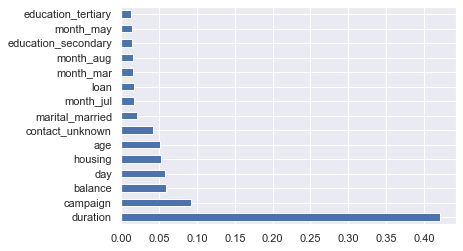

In [54]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_,index=df_cols.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Now replace SMOTE with PCA (Principal Component Analysis) in the preprocessing pipeline. This is another technique often employed to address imbalnce by vectorizing the data. The result is similar to the non-SMOTE recall and ROCAUC levels.We will also check with both in the pipleline together.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.2s finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 42, 'rfc__n_estimators': 100, 'rfc__max_depth': None, 'rfc__criterion': 'gini', 'rfc__class_weight': None}
Tuned RandomizedSearchCV Accuracy: 0.9360000000000002
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__class_weight': [None],
                                        'rfc__criterion': ['gini'],
                                        'rfc__max_depth': [None],
                                        'rfc__n_estimators': [100],
                                        'rfc__random_state': [42]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:1.0000
ROCAUC SCORE:1.0000
ACCURACY SCORE:1.0000
F1 SCORE:

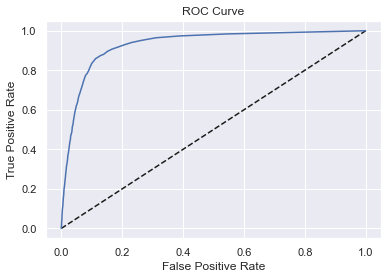

CPU times: user 24.8 s, sys: 428 ms, total: 25.2 s
Wall time: 1min 8s


In [55]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
#         ('smote', SMOTE()),         
         ('rfc', RandomForestClassifier(n_estimators=100))
]

pipeline = Pipeline(steps)

param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                'rfc__random_state' : [seed],
                'rfc__criterion' : ['gini'],
                'rfc__n_estimators' : [100],              
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Note the feature importance is much different with PCA. "Duration" is no longer influential, and the highest level is still lower than the second most important when duration dominated.

<AxesSubplot:>

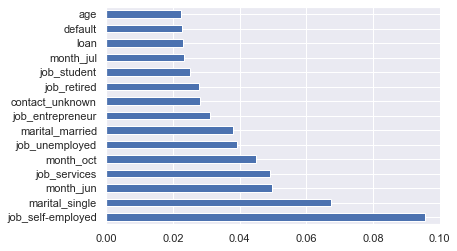

In [56]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_,index=df_cols.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Including both PCA and SMOTE in the pipeline results in recall at 63% and ROCAUC at 78%, and it seems logical to use both preprocessing techniques on this imbalanced data. Note that the final model will include PCA, and the importance of the "duration" feature is diminished. 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 42, 'rfc__n_estimators': 100, 'rfc__max_depth': None, 'rfc__criterion': 'gini', 'rfc__class_weight': None}
Tuned RandomizedSearchCV Accuracy: 0.9178571428571429
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('smote', SMOTE()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__class_weight': [None],
                                        'rfc__criterion': ['gini'],
                                        'rfc__max_depth': [None],
                                        'rfc__n_estimators': [100],
                                        'rfc__random_state': [42]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:1.0000
ROCAUC SCORE:1.0000
ACCURACY SC

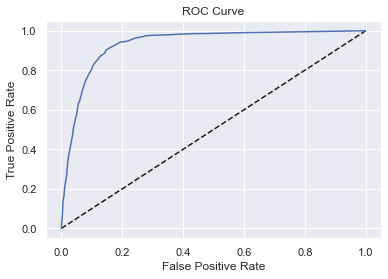

CPU times: user 45 s, sys: 683 ms, total: 45.7 s
Wall time: 2min 22s


In [57]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

pipeline = Pipeline(steps)

param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                'rfc__random_state' : [seed],
                'rfc__criterion' : ['gini'],
                'rfc__n_estimators' : [100],              
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<AxesSubplot:>

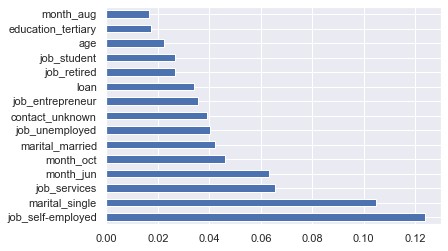

In [58]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_,index=df_cols.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Now use the HYPEROPT best parameters for the RFC model as an alternative to the defaults in RandomizedSearchCV. Surprisingly, all the default parameters were chosen.

 # Hyperopt Random Forest best model parameters
 Accuracy: 0.937
 {'learner': RandomForestClassifier(max_features=0.6313798399021293, min_samples_leaf=4,
                       n_estimators=71, n_jobs=1, random_state=1,
                      verbose=False), 'preprocs': (), 'ex_preprocs': ()}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.3min finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 42, 'rfc__n_jobs': 1, 'rfc__n_estimators': 100, 'rfc__min_samples_leaf': 1, 'rfc__max_features': 'auto'}
Tuned RandomizedSearchCV Accuracy: 0.9184285714285714
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('smote', SMOTE()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__max_features': ['auto',
                                                              0.6313798399021293],
                                        'rfc__min_samples_leaf': [1, 4],
                                        'rfc__n_estimators': [71, 100],
                                        'rfc__n_jobs': [-1, 1],
                                        'rfc__random_state': [42, 1]},
           

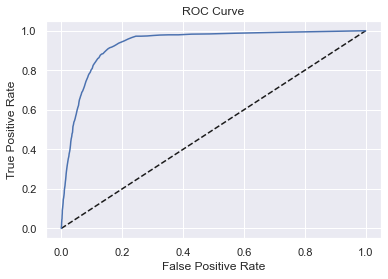

CPU times: user 42.6 s, sys: 392 ms, total: 43 s
Wall time: 28min 58s


In [59]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('rfc', RandomForestClassifier())
         ]

pipeline = Pipeline(steps)

param_grid = {
                'rfc__random_state' : [seed, 1],
                'rfc__n_estimators' : [71, 100],
                'rfc__max_features' : ['auto', 0.6313798399021293],
                'rfc__n_jobs' : [-1,1],
                'rfc__min_samples_leaf' : [1,4]
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Run the Nearest Centroid model. This was the best in terms of accuracy and recall from LazyPredict. The test result is replicated, but there are better performing models when preprocessing is included.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


Tuned RandomizedSearchCV Parameter: {'nc__shrink_threshold': None}
Tuned RandomizedSearchCV Accuracy: 0.8865714285714287
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('smote', SMOTE()),
                                             ('nc', NearestCentroid())]),
                   n_jobs=-1,
                   param_distributions={'nc__shrink_threshold': [None]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:0.7401
ROCAUC SCORE:0.8198
ACCURACY SCORE:0.8880
F1 SCORE:0.4886
CONFUSION MATRIX:
[[23366  2610]
 [  526  1498]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     0.98    0.36      0.89       0.67          0.93
recall        0.90    0.74      0.89       0.82          0.89
f1-score      0.94    0.49      0.89       0.71          0.90
support   25976.00 2024.00      0.89   28000.00      28000.00


TESTING

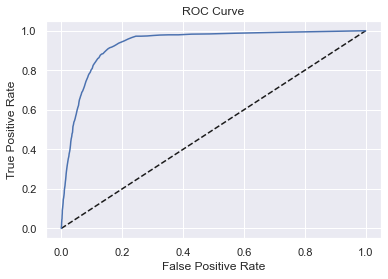

CPU times: user 1.39 s, sys: 164 ms, total: 1.56 s
Wall time: 2.11 s


In [60]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('nc', NearestCentroid()),
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)

param_grid = {'nc__shrink_threshold' : [None],

}

# Instantiate the RandomizedSearchCV object
nc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
nc.fit(X_train, y_train)

nc_predict = nc.predict(X_test)

y_test_pred = nc.predict(X_test)
y_train_pred = nc.predict(X_train)
#y_test_pred_proba = nc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(nc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(nc.best_score_))

print(nc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Using the best RFC parameters from HYPEROPT rather than the defaults selected by RandomizedSearchCV, the train results is more realistic, at 99% instead of perfect accuracy. The test result shows 72% recall with 82% ROCAUC and 91% accuracy. This can be considered a better overall resut in terms of reducing overfitting while maintaining a high level of accuracy.  

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


Tuned RandomizedSearchCV Parameter: {'rfc__random_state': 1, 'rfc__n_jobs': 1, 'rfc__n_estimators': 71, 'rfc__min_samples_leaf': 4, 'rfc__max_features': 0.6313798399021293}
Tuned RandomizedSearchCV Accuracy: 0.9092857142857141
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('smote', SMOTE()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfc__max_features': [0.6313798399021293],
                                        'rfc__min_samples_leaf': [4],
                                        'rfc__n_estimators': [71],
                                        'rfc__n_jobs': [1],
                                        'rfc__random_state': [1]},
                   verbose=True)
TRAINING RESULTS: 
RECALL SCORE:0.9980
ROCAUC SCORE:0.

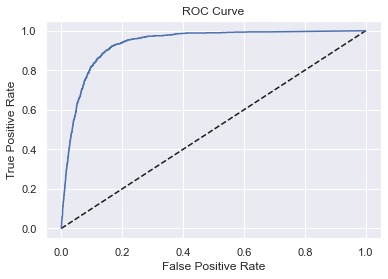

CPU times: user 1min 55s, sys: 483 ms, total: 1min 55s
Wall time: 5min 46s


In [61]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('rfc', RandomForestClassifier())
         ]

pipeline = Pipeline(steps)

param_grid = {
                'rfc__random_state' : [1],
                'rfc__n_estimators' : [71],
                'rfc__max_features' : [0.6313798399021293],
                'rfc__n_jobs' : [1],
                'rfc__min_samples_leaf' : [4]
}

# Instantiate the RandomizedSearchCV object
rfc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(rfc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(rfc.best_score_))

print(rfc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## The Gradient Boosting Classifier (GBC) result from HYPEROPT is replicated using the preprocessing in the pipleine with the best parameters. This can be considered the highest scoring model by slim margins over RFC in each category: test recall 74%, ROCAUC 83% and accuracy 91%. 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


Tuned RandomizedSearchCV Parameter: {'gbc__subsample': 0.5294663431161745, 'gbc__random_state': 0, 'gbc__n_estimators': 482, 'gbc__min_samples_leaf': 7, 'gbc__max_features': 0.6084368862892253, 'gbc__learning_rate': 0.16396519462753492}
Tuned RandomizedSearchCV Accuracy: 0.9033214285714285
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('smote', SMOTE()),
                                             ('gbc',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'gbc__learning_rate': [0.16396519462753492],
                                        'gbc__max_features': [0.6084368862892253],
                                        'gbc__min_samples_leaf': [7],
                                        'gbc__n_estimators': [482],
                                        'gbc__random_state':

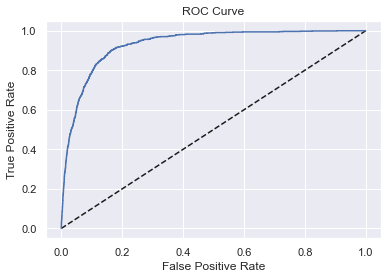

CPU times: user 1min 51s, sys: 792 ms, total: 1min 52s
Wall time: 5min 56s


In [62]:
%%time
# Setup the pipeline
# Replace the sklearn Pipeline with imblearn Pipeline for SMOTE
from imblearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('smote', SMOTE()),         
         ('gbc', GradientBoostingClassifier())
         ]

pipeline = Pipeline(steps)

param_grid = {'gbc__learning_rate' : [0.16396519462753492],
                'gbc__max_features' : [0.6084368862892253], 
                'gbc__min_samples_leaf' : [7],
                'gbc__n_estimators' : [482], 
                'gbc__random_state' : [0],
                'gbc__subsample' : [0.5294663431161745]
}

# Instantiate the RandomizedSearchCV object
gbc = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
gbc.fit(X_train, y_train)

gbc_predict = gbc.predict(X_test)

y_test_pred = gbc.predict(X_test)
y_train_pred = gbc.predict(X_train)
y_test_pred_proba = gbc.predict_proba(X_test)[:,1]

# Print the optimal parameters, best scores, and train/test scores
print("Tuned RandomizedSearchCV Parameter: {}".format(gbc.best_params_))
print("Tuned RandomizedSearchCV Accuracy: {}".format(gbc.best_score_))

print(gbc)

print("TRAINING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_train, y_train_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_train, y_train_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")

clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print()
print()

print("TESTING RESULTS: \n===============================")
print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
print(f"ROCAUC SCORE:{roc_auc_score(y_test, y_test_pred):.4f}")
print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:{f1_score(y_test, y_test_pred):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## The goal of achieving 81% accuracy is easily exceeded. We can optimize the Recall and ROCAUC while maintaining the level of accuracy by reviewing various models, parameters, and data transformations. Since the response, or success rate, is highly imbalanced, it means that even a model with relatively low accuracy can be useful in a data driven Decision Support System (DSS). For example, in our test set comprised of 12k observations, we can quickly eliminate roughly 10k from the call list, as poor candidates for success.

## The exploratory data analysis and feature importance revealed some features that contribute the most to the model. Here are a few examples of top 4 feature usefulness:

* Duration - The duration of the last contact in seconds is the most important feature before apply PCA. Even though its importance is reduced in the final model, the intuition is that there is an optimal target length which should not be too short or too long.

* Balance - This is the average yearly balance of term deposit in euros. This points to the amount of money the customer is able to place on term deposit. It seems obvious that a prerequisite is having the funds avaiable for a Term Deposit

* Age - We can create groupings for this numerical feature such as separation by decade. There are some demographic patterns which emerge, as it appears certain age groups can be targeted.  

* Day - The last contact day of the month. The results shows that there are certain contact days that are most likely to result in the customer buying a term deposit. Perhaps more resources could be used for calling on targeted days, if there is flexibility in scheduling.   

## A suggestion for continuously updating the DSS is to segregate the call lists and track the results. For example, some marketers will have the "good" list and others the "bad" list. Tracking the results going forward can help validate the model results or lead to other discoveries.  

